In [1]:
%load_ext nb_black
import numpy as np
from typing import Tuple
import jax.numpy as jnp
import jax

%matplotlib inline
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

# Lecture 12
## Variational inference for the PSD model

## The PSD model
Recapping last lecture, we learned about the Pritchard-Stephens-Donnelly model, which says that:

$$p(X_{i,\ell} = k \mid P,Q,Z) = P_{Z_{i,\ell},k}$$ 

where 

$$Z_{i,\ell} \sim \mathrm{Dirichlet}(Q_i)$$.

This model has had a great impact in genetics. But one criticism is that, since it relies on MCMC sampling, it is slow.

## Stochastic variational inference
Today we will look at a fast version of PSD called [TeraStructure](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5127768/). The main idea of this paper is to use recent developments in [stochastic variational inference](https://jmlr.org/papers/volume14/hoffman13a/hoffman13a.pdf) to get a huge speedup on the PSD model.

I am going to change notation in order to match the TeraStructure paper. From now on we will call $P\to \beta$ and $Q\to \theta$. 

We will use the following variational approximation:

$$q(\beta,\theta)=\prod_{k=1}^K q(\beta_k) \prod_{i=1}^N q(\theta_i)$$

where $q(\beta) \sim \mathrm{Beta}(\hat{\beta}_1, \hat{\beta}_2)$ and $q(\theta) \sim \mathrm{Dirichlet}(\hat \theta)$. That is, we will find a procedure for fitting $\hat{\beta},\hat{\theta}$ such that 

$$q^*(\theta,\beta) \approx \arg\min D_{KL}(q(\beta,\theta) \Vert p(\theta,\beta\mid X))$$

## Variational inference in non-conjugate models
If we want to Gibbs sample $\beta_{k,\ell}$, we have 
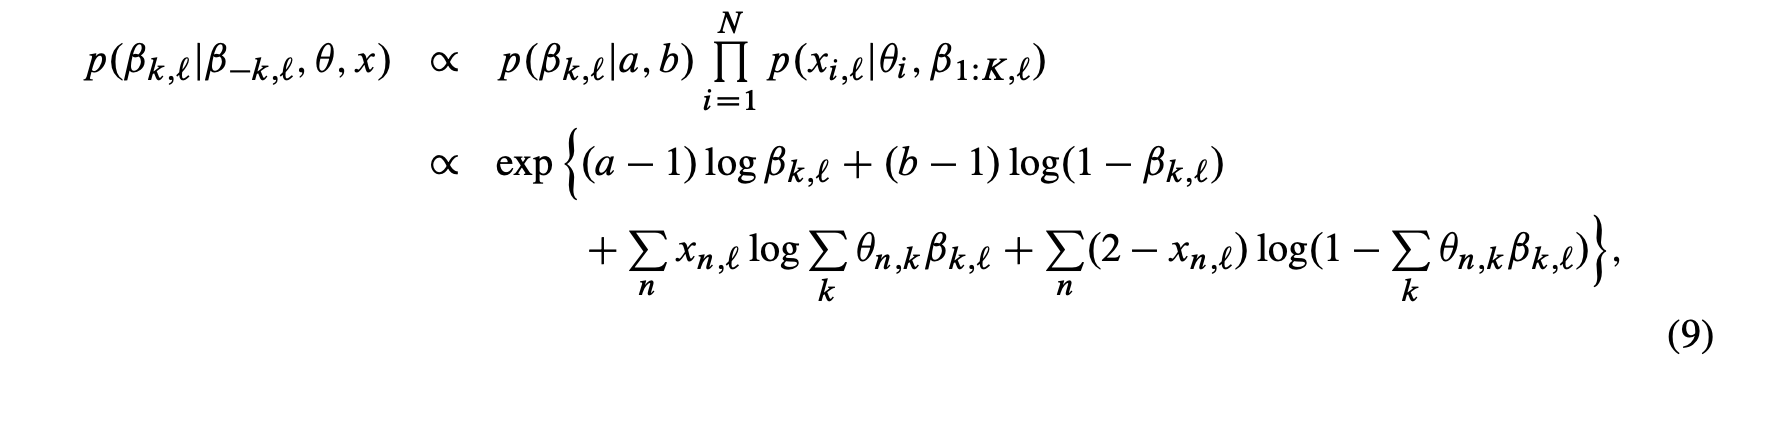

This is non-conjugate in the sense that the distribution of $\beta_{k,\ell}$ is not a member of the family of beta distributions $q(\beta)$ defined above.

The problem is with the $\log \sum_k \theta_{n,k}\beta_{k,\ell}$ and $\log(1-\sum_k \theta_{n,k} \beta_{k,\ell})$ terms. To get around this we use a [trick](https://arxiv.org/abs/1209.4360):
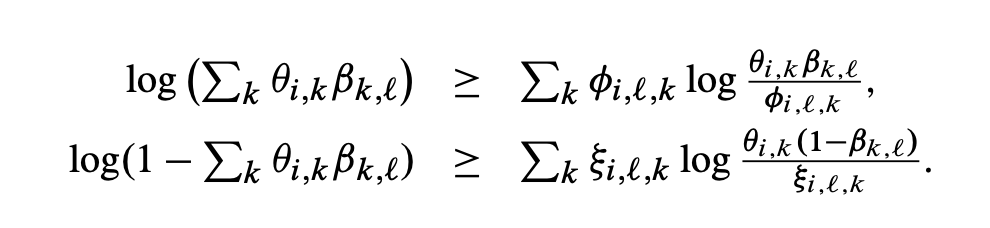

Here, the $\phi_{i,\ell,k}$ and $\xi_{i,\ell,k}$ are parameters to be chosen later. Then, we have 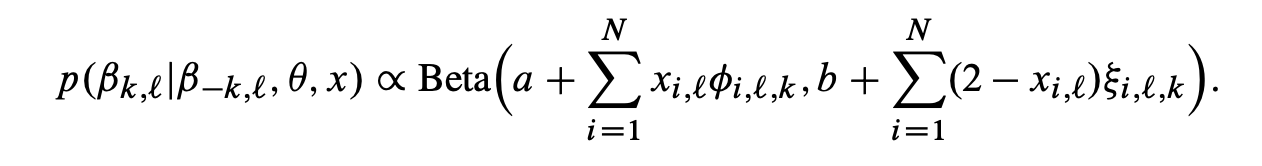

You can work out that this preserves the ELBO, so that maximizing over this class of distributions still gives a valid lower bound.

This leads to a very simple algorithm for updating the variational hyperparameters:
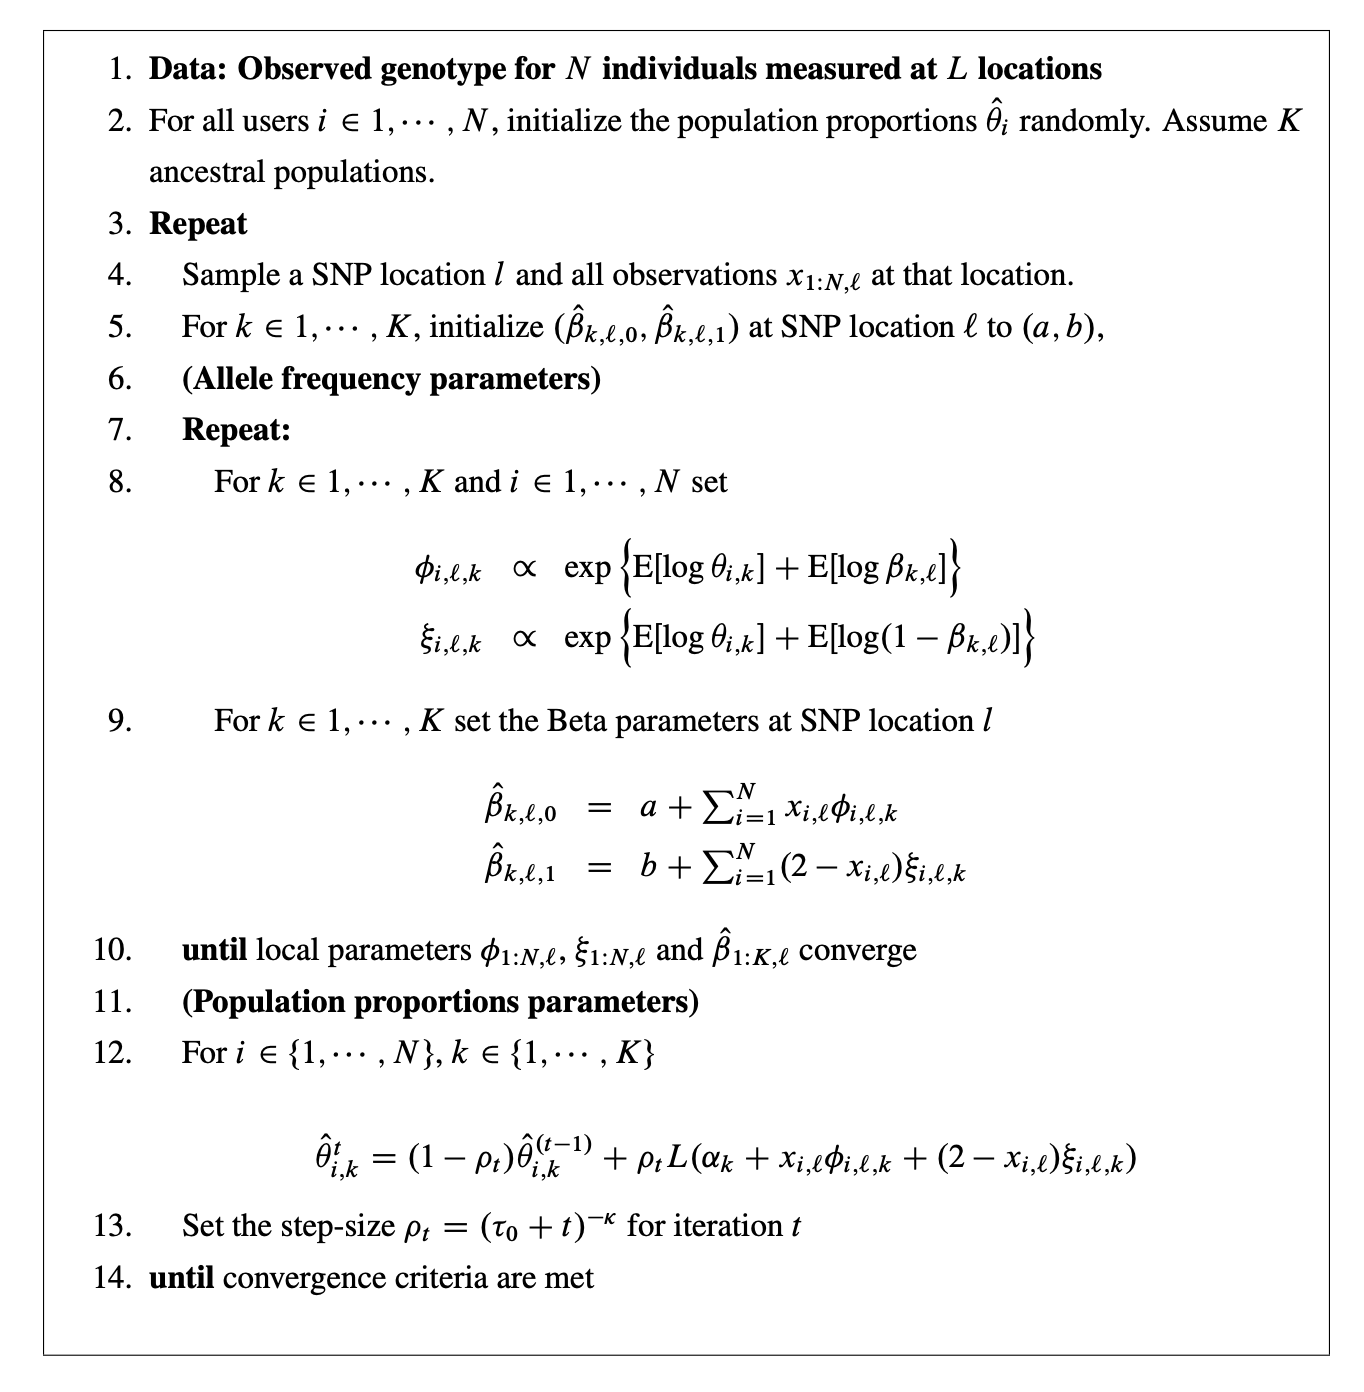

In fact, this algorithm is so simple that we can implement it in class. We will do so now.

In [3]:
def tera_psd(X: jnp.ndarray, K: int, seed: int, eps: float = 1e-4) -> jnp.ndarray:
    """Run PSD on diploid genotype data.

    Args:
        X: Array of dimension [N, L] \in {0, 1, 2} giving genotype of N diploid samples at L loci.
        K: number of subpopulations

    Returns:
        Variational Bayesian approximation to the posterior distribution on theta. That is,

            theta[n] ~ Dirichlet(return_val[n])

        for n = 1, ..., N.
    """
    pass

<IPython.core.display.Javascript object>